# <font color = 'Green'><u><b>Movie Recommender System - Data Acquisition & Understanding</b></u></font>

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Movie-Recommender-System---Data-Acquisition-&amp;-Understanding" data-toc-modified-id="Movie-Recommender-System---Data-Acquisition-&amp;-Understanding-1"><span class="toc-item-num">1&nbsp;&nbsp;</span><font color="Green"><u><b>Movie Recommender System - Data Acquisition &amp; Understanding</b></u></font></a></span><ul class="toc-item"><li><span><a href="#Imports" data-toc-modified-id="Imports-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span><font color="green"><u>Imports</u></font></a></span></li><li><span><a href="#Load-Data" data-toc-modified-id="Load-Data-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span><font color="green"><u>Load Data</u></font></a></span></li><li><span><a href="#EDA" data-toc-modified-id="EDA-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span><font color="green"><u>EDA</u></font></a></span><ul class="toc-item"><li><span><a href="#Initial-Analysis" data-toc-modified-id="Initial-Analysis-1.3.1"><span class="toc-item-num">1.3.1&nbsp;&nbsp;</span><u>Initial Analysis</u></a></span><ul class="toc-item"><li><span><a href="#Observations:" data-toc-modified-id="Observations:-1.3.1.1"><span class="toc-item-num">1.3.1.1&nbsp;&nbsp;</span>Observations:</a></span></li></ul></li><li><span><a href="#Sweetviz-Report" data-toc-modified-id="Sweetviz-Report-1.3.2"><span class="toc-item-num">1.3.2&nbsp;&nbsp;</span><u>Sweetviz Report</u></a></span><ul class="toc-item"><li><span><a href="#observation-of-Sweetviz-report:" data-toc-modified-id="observation-of-Sweetviz-report:-1.3.2.1"><span class="toc-item-num">1.3.2.1&nbsp;&nbsp;</span>observation of Sweetviz report:</a></span></li></ul></li><li><span><a href="#Detailed-Analysis" data-toc-modified-id="Detailed-Analysis-1.3.3"><span class="toc-item-num">1.3.3&nbsp;&nbsp;</span><u>Detailed Analysis</u></a></span><ul class="toc-item"><li><span><a href="#Observations:" data-toc-modified-id="Observations:-1.3.3.1"><span class="toc-item-num">1.3.3.1&nbsp;&nbsp;</span>Observations:</a></span></li></ul></li></ul></li></ul></li></ul></div>

## <font color = 'green'><u>Imports</u></color>

In [1]:
import pandas as pd
import seaborn as sns
import sweetviz as sv
import numpy as np
import matplotlib.pyplot as plt

import plotly.express as px

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 50)

## <font color = 'green'><u>Load Data</u></color>

In [2]:
#list of movies and there genre
movies = pd.read_csv("../../Data/ml-25m/movies.csv") #load the mushrooms data
#rating given to a movie by a user
ratings = pd.read_csv("../../Data/ml-25m/ratings.csv") #load the mushrooms data
#links to the movies on imdb and tmdb(not really used for recomender system but will be used in final product to show additional info)
links = pd.read_csv("../../Data/ml-25m/links.csv") #load the mushrooms data

## <font color = 'green'><u>EDA</u></color>

### <u>Initial Analysis</u>

In [3]:
movies.head(10)


,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy
5,6,Heat (1995),Action|Crime|Thriller
6,7,Sabrina (1995),Comedy|Romance
7,8,Tom and Huck (1995),Adventure|Children
8,9,Sudden Death (1995),Action
9,10,GoldenEye (1995),Action|Adventure|Thriller


In [4]:
ratings.head(10)

,userId,movieId,rating,timestamp
0,1,296,5.0,1147880044
1,1,306,3.5,1147868817
2,1,307,5.0,1147868828
3,1,665,5.0,1147878820
4,1,899,3.5,1147868510
5,1,1088,4.0,1147868495
6,1,1175,3.5,1147868826
7,1,1217,3.5,1147878326
8,1,1237,5.0,1147868839
9,1,1250,4.0,1147868414


In [5]:
links.head(10)

,movieId,imdbId,tmdbId
0,1,114709,862.0
1,2,113497,8844.0
2,3,113228,15602.0
3,4,114885,31357.0
4,5,113041,11862.0
5,6,113277,949.0
6,7,114319,11860.0
7,8,112302,45325.0
8,9,114576,9091.0
9,10,113189,710.0


In [6]:
movies.shape

(62423, 3)

In [7]:
links.shape

(62423, 3)

In [8]:
ratings.shape

(25000095, 4)

In [9]:
#check for missing values
movies.isnull().sum()

movieId    0
title      0
genres     0
dtype: int64

In [10]:
links.isnull().sum()

movieId      0
imdbId       0
tmdbId     107
dtype: int64

In [11]:
ratings.isnull().sum()

userId       0
movieId      0
rating       0
timestamp    0
dtype: int64

In [12]:
movies.dtypes

movieId     int64
title      object
genres     object
dtype: object

In [13]:
ratings.dtypes

userId         int64
movieId        int64
rating       float64
timestamp      int64
dtype: object

In [14]:
ratings['userId'].nunique()

162541

#### Observations:

- There are 62,423 movies in the database
    - There are no missing values for any of the movies
    
    
- All the movies have links available to imdb page for the movie but 107 of them are missing links to the tmdb page


- There are 25M user ratings available for all the movies
    - there are no missing values in any of the columns for the ratings data
    
    
- There is some no catagorical data in the ratings data


- There is some catagorical data in the movies data such as the title of the movie
    - There is a unique integer movieID associated with each movie so need to convert this into a numerical variable


- There are 162,541 unique user ratings

### <u>Sweetviz Report</u>

In [15]:
#generate a sweenviz report for the movies data
movies_report = sv.analyze(movies)

#Dispaly Sweetviz report on the movies data
movies_report.show_html()


Report SWEETVIZ_REPORT.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


In [16]:
#generate a sweenviz report for the ratings data
ratings_report = sv.analyze(ratings)

#Dispaly Sweetviz report on the ratings data
ratings_report.show_html()


Report SWEETVIZ_REPORT.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


#### observation of Sweetviz report:
- 47% of the movies were given a rating of 3 or 4


- Only about 7% of the movies had a rating of 1 or less


- There are a total of 1639 unique movie genres

### <u>Detailed Analysis</u>

In [17]:
#average ratings of the movie
pd.pivot_table(ratings,index='movieId',values='rating')

,rating
movieId,
1,3.893708
2,3.251527
3,3.142028
4,2.853547
5,3.058434
...,...
209157,1.500000
209159,3.000000
209163,4.500000


<AxesSubplot:xlabel='rating', ylabel='Count'>

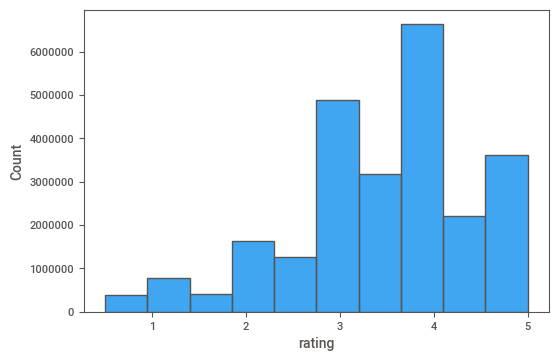

In [18]:
#rating distribution of the movies
sns.histplot(ratings,x='rating',bins=10)

In [19]:
#min number of users that voted on a movie
ratings['movieId'].value_counts().min()

1

In [20]:
#average number of users that voted on a movie
ratings['movieId'].value_counts().mean()

423.3931444442563

In [21]:
#max number of users that voted on a movie
ratings['movieId'].value_counts().max()

81491

In [22]:
#number of users that gave a particular rating to a specific movie
ratingsUser = pd.crosstab([ratings.movieId.value_counts()],ratings.rating,margins=True)
ratingsUser

rating,0.5,1.0,1.5,2.0,2.5,3.0,3.5,4.0,4.5,5.0,All
movieId,,,,,,,,,,,
1,126,336,173,672,490,2044,1239,2776,857,1585,10298
2,107,216,139,535,381,1500,921,2057,608,1169,7633
3,46,154,69,323,270,993,572,1371,439,686,4923
4,32,107,53,239,157,689,422,985,276,513,3473
5,31,85,35,164,111,478,313,724,210,362,2513
...,...,...,...,...,...,...,...,...,...,...,...
74127,0,0,0,0,0,1,0,0,0,0,1
79672,0,0,0,0,0,0,0,1,0,0,1
81482,0,0,0,0,0,0,0,1,0,0,1


#### Observations:

- most movies have a rating between 3.0 and 5.0
    - 3 and 4 are the most common ratings
    
- on average each movie has 423 unique user rankings on it
    - 1 lowest amount of unique user ratings a movie has
    - 81491 the max amount of user ratings a movie has